In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
df = pd.read_csv("NIH_data.csv")

In [4]:
df.head()

,NIH Spending Categorization,Project Terms,Project Title,Public Health Relevance,Administering IC,Application ID,Award Notice Date,FOA,Project Number,Type,...,CFDA Code,Funding Mechanism,Fiscal Year,Total Cost,Total Cost (Sub Projects),Funding IC(s),Direct Cost IC,InDirect Cost IC,NIH COVID-19 Response,Total Cost IC
0,No NIH Category available,Biology;Cell Therapy;Transfusion,Transfusion Biology and Cellular Therapies,"PROJECT NARRATIVE\nHistorically, the primary f...",NHLBI,10109133,2/24/21 0:00,PA-14-015,5T32HL066987-20,5,...,839,"Training, Institutional",2021,423336,,NHLBI,571012,45681,,423336
1,No NIH Category available,Antineoplastic Agents;Archives;Award;Basic Sci...,Dana-Farber/Harvard Cancer Center,Overall\nProject Narrative\nThe primary goal o...,NCI,10292693,11/17/20 0:00,PAR-13-386,3P30CA006516-56S1,3,...,397,Research Centers,2021,95833,,NCI,54296,41537,,95833
2,No NIH Category available,Antineoplastic Agents;Archives;Award;Basic Sci...,Dana-Farber/Harvard Cancer Center,Overall\nProject Narrative\nThe primary goal o...,NCI,10062850,11/10/20 0:00,PAR-13-386,5P30CA006516-56,5,...,397,Research Centers,2021,11475747,,NCI,8237679,3238068,,11475747
3,No NIH Category available,Antineoplastic Agents;Archives;Award;Basic Sci...,Dana-Farber/Harvard Cancer Center,Overall\nProject Narrative\nThe primary goal o...,NCI,10292694,11/19/20 0:00,PAR-13-386,3P30CA006516-56S2,3,...,397,Research Centers,2021,59999,,NCI,33898,26101,,59999
4,No NIH Category available,Antineoplastic Agents;Archives;Award;Basic Sci...,Dana-Farber/Harvard Cancer Center,Overall\nProject Narrative\nThe primary goal o...,NCI,10292695,11/30/20 0:00,PAR-13-386,3P30CA006516-56S3,3,...,397,Research Centers,2021,197986,,NCI,111857,86129,,197986


In [7]:
IC_set = subset_df["Administering IC"].unique()

In [8]:
print(IC_set)

['NHLBI' 'NCI' 'NEI' 'NIEHS' 'FIC' 'NINDS' 'NIAID' 'NICHD' 'NIDDK' 'NIDCD'
 'NCCIH' 'NIAMS' 'NIA' 'AHRQ' 'NIGMS' 'NIMH' 'NHGRI' 'FDA' 'NIMHD' 'NIDA'
 'NIDCR' 'NIOSH' 'NIBIB' 'NCATS' 'NLM' 'OD' 'ATSDR' 'NIAAA' 'CGH' 'NCEZID'
 'NCCDPHP' 'CLC' 'NINR' 'VA' 'ACF' 'NCHHSTP' 'COTPER' 'NCEH' 'NCIRD'
 'ODCDC' 'NCRR']


In [61]:
IC_funding_avgs = {}
subset_df["Total Cost IC"] = pd.to_numeric(subset_df["Total Cost IC"], errors='coerce')
subset_df = subset_df[subset_df['Total Cost IC'].notna()]

for IC in IC_set:
    
    IC_funding_col = subset_df[subset_df["Administering IC"] == IC]["Total Cost IC"]
    IC_funding = sum(IC_funding_col)
    IC_funding_size = len(IC_funding_col)
    if IC_funding_size:
        IC_funding_avgs[IC] = IC_funding / IC_funding_size
        
IC_funding_avgs = {k: v for k, v in sorted(IC_funding_avgs.items(), key=lambda item:item[1])}

In [62]:
def plot_funding_bar_std(funding_dict):
    directorates = funding_dict.keys()
    x_pos = np.arange(len(directorates))
    means = []
    stds = []
    for directorate in directorates:
        means.append(np.mean(funding_dict[directorate]))
        stds.append(np.std(funding_dict[directorate]))
        
    fig, ax = plt.subplots()
    ax.bar(x_pos, means, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_ylabel('Average Awarded Amount to Date (Millions of $)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(directorates, fontsize=8)
    scale_y = 1e6
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
    ax.yaxis.set_major_formatter(ticks_y)
    ax.set_title('Average Harvard Lab NIH Funding by Administering IC')
    ax.yaxis.grid(True)
    
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig('avg_plot_NIH.png')
    plt.show()


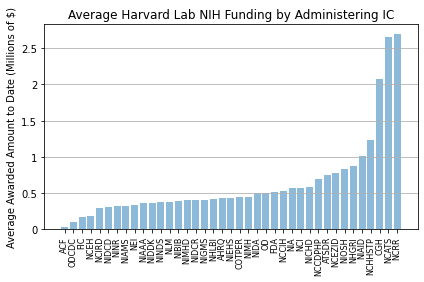

In [63]:
plot_funding_bar_std(IC_funding_avgs)